<a href="https://colab.research.google.com/github/dbckz/crossing-the-line/blob/master/notebooks/classification_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Old

In [ ]:
hb_tweets = pd.read_csv("/content/drive/MyDrive/University/Dissertation/evaluation/tweets_hb.csv")

persp_tweets = pd.read_csv("/content/drive/MyDrive/University/Dissertation/evaluation/tweets_persp.csv")

In [ ]:
hb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    4970 non-null   int64 
 1   tweet_text  4970 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.8+ KB


In [ ]:
intersection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    240 non-null    int64 
 1   tweet_text  240 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
intersection = pd.merge(hb_tweets, persp_tweets, how='inner', on=['tweet_id', 'tweet_text'])

In [ ]:
hb_sample = pd.concat([hb_tweets,intersection]).drop_duplicates(keep=False).sample(380)
persp_sample = pd.concat([persp_tweets,intersection]).drop_duplicates(keep=False).sample(380)

In [ ]:
final = pd.concat([hb_sample, persp_sample, intersection])

In [ ]:
final.to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/offensive.csv", index=False)

# Redo

In [3]:
root_path = "/content/drive/MyDrive/University/Dissertation/data_collection"

In [4]:
persp_df = pd.read_csv(root_path + '/regression_tweets.csv',
                      usecols = [
                                  'tweet_id',
                                  'tweet_text',
                                  'persp_over_threshold'
                      ])

In [5]:
len(persp_df)

1046319

In [7]:
hb_df = pd.read_csv(root_path + '/regression_tweets_hb.csv',
                      usecols = [
                                  'tweet_id',
                                  'tweet_text',
                                  'contains_slurs'
                      ])

In [8]:
len(hb_df)

1046319

In [9]:
persp_hateful = persp_df[persp_df['persp_over_threshold'] == True].sample(500)
persp_not_hateful = persp_df[persp_df['persp_over_threshold'] == False].sample(500)

In [10]:
hb_hateful = hb_df[hb_df['contains_slurs'] == True].sample(500)
hb_not_hateful = hb_df[hb_df['contains_slurs'] == False].sample(500)

In [11]:
persp_hateful[['tweet_id', 'tweet_text']].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/persp_hateful.csv", index=False)
persp_not_hateful[['tweet_id', 'tweet_text']].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/persp_not_hateful.csv", index=False)

In [12]:
hb_hateful[['tweet_id', 'tweet_text']].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/hb_hateful.csv", index=False)
hb_not_hateful[['tweet_id', 'tweet_text']].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/hb_not_hateful.csv", index=False)

In [ ]:
# At this point, go manually evaluate

# Confusion matrix

In [13]:
persp_hateful_reviewed = pd.read_csv('/content/drive/MyDrive/University/Dissertation/evaluation/persp_hateful_reviewed.csv',
                      usecols = [
                                  'tweet_id',
                                  'is_hateful_manual',
                                  'tweet_text'
                      ])

persp_hateful_reviewed['is_hateful_manual'] = persp_hateful_reviewed['is_hateful_manual'].eq('Y')
len(persp_hateful_reviewed)

500

In [14]:
persp_not_hateful_reviewed = pd.read_csv('/content/drive/MyDrive/University/Dissertation/evaluation/persp_not_hateful_reviewed.csv',
                      usecols = [
                                  'tweet_id',
                                  'is_hateful_manual',
                                  'tweet_text'
                      ])

persp_not_hateful_reviewed['is_hateful_manual'] = persp_not_hateful_reviewed['is_hateful_manual'].eq('Y')
len(persp_not_hateful_reviewed)

500

In [15]:
hb_hateful_reviewed = pd.read_csv('/content/drive/MyDrive/University/Dissertation/evaluation/hb_hateful_reviewed.csv',
                      usecols = [
                                  'tweet_id',
                                  'is_hateful_manual',
                                  'tweet_text'
                      ])

hb_hateful_reviewed['is_hateful_manual'] = hb_hateful_reviewed['is_hateful_manual'].eq('Y')
len(hb_hateful_reviewed)

500

In [16]:
hb_not_hateful_reviewed = pd.read_csv('/content/drive/MyDrive/University/Dissertation/evaluation/hb_not_hateful_reviewed.csv',
                      usecols = [
                                  'tweet_id',
                                  'is_hateful_manual',
                                  'tweet_text'
                      ])

hb_not_hateful_reviewed['is_hateful_manual'] = hb_not_hateful_reviewed['is_hateful_manual'].eq('Y')
len(hb_not_hateful_reviewed)

500

In [17]:
persp_tp = persp_hateful_reviewed['is_hateful_manual'][persp_hateful_reviewed['is_hateful_manual'] == True].count()
persp_fp = persp_hateful_reviewed['is_hateful_manual'][persp_hateful_reviewed['is_hateful_manual'] == False].count()
persp_tn = persp_not_hateful_reviewed['is_hateful_manual'][persp_not_hateful_reviewed['is_hateful_manual'] == False].count()
persp_fn = persp_not_hateful_reviewed['is_hateful_manual'][persp_not_hateful_reviewed['is_hateful_manual'] == True].count()

print(f"Perspective True Positives: {persp_tp}")
print(f"Perspective False Positives: {persp_fp}")
print(f"Perspective True Negatives: {persp_tn}")
print(f"Perspective False Negatives: {persp_fn}")

Perspective True Positives: 357
Perspective False Positives: 143
Perspective True Negatives: 477
Perspective False Negatives: 23


In [18]:
hb_tp = hb_hateful_reviewed['is_hateful_manual'][hb_hateful_reviewed['is_hateful_manual'] == True].count()
hb_fp = hb_hateful_reviewed['is_hateful_manual'][hb_hateful_reviewed['is_hateful_manual'] == False].count()
hb_tn = hb_not_hateful_reviewed['is_hateful_manual'][hb_not_hateful_reviewed['is_hateful_manual'] == False].count()
hb_fn = hb_not_hateful_reviewed['is_hateful_manual'][hb_not_hateful_reviewed['is_hateful_manual'] == True].count()


print(f"Hatebase True Positives: {hb_tp}")
print(f"Hatebase False Positives: {hb_fp}")
print(f"Hatebase True Negatives: {hb_tn}")
print(f"Hatebase False Negatives: {hb_fn}")


Hatebase True Positives: 187
Hatebase False Positives: 313
Hatebase True Negatives: 468
Hatebase False Negatives: 32


In [26]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          save_path=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    plt.rcParams.update({'font.size': 16})


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    g = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    g.set_yticklabels(labels=g.get_yticklabels(), va='center')

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

    if save_path != None:
        plt.savefig(save_path, )

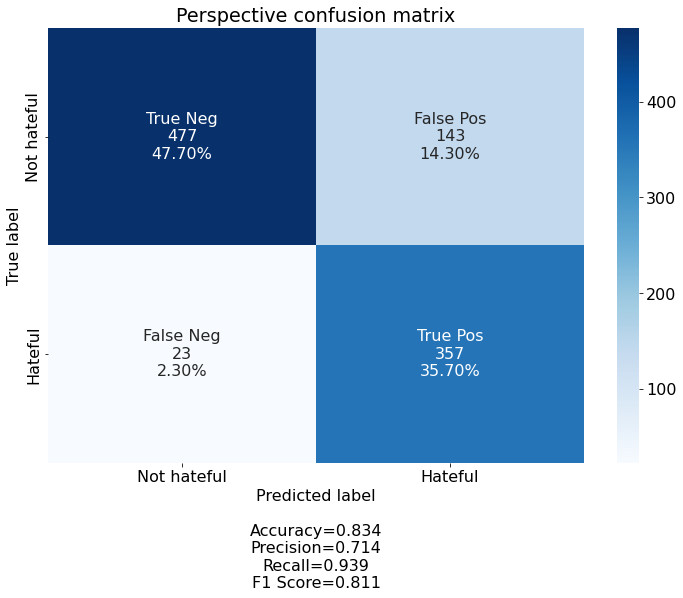

In [27]:
persp_cf = np.array([[persp_tn, persp_fp],
               [persp_fn, persp_tp]])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not hateful', 'Hateful']
make_confusion_matrix(persp_cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      title="Perspective confusion matrix",
                      figsize=[12.0, 8.0],
                      save_path="/content/drive/MyDrive/University/Dissertation/images/perspective_confusion_matrix.png"
                      )

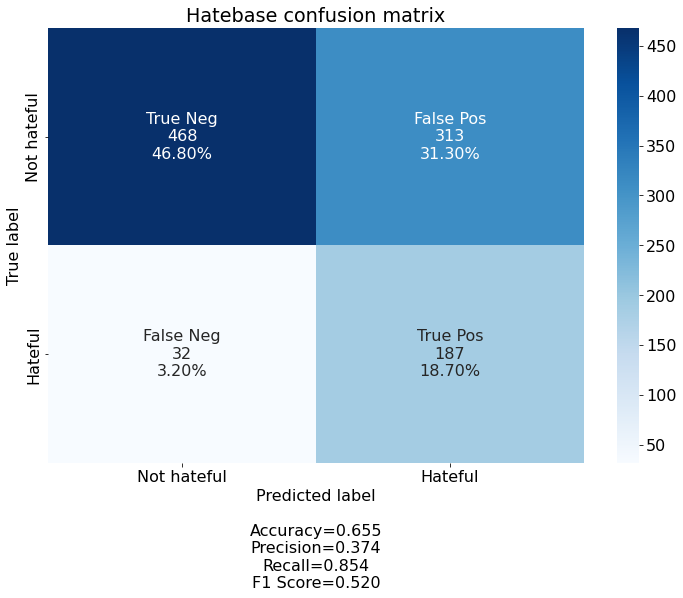

In [21]:
hb_cf = np.array([[hb_tn, hb_fp],
               [hb_fn, hb_tp]])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not hateful', 'Hateful']
make_confusion_matrix(hb_cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      title="Hatebase confusion matrix",
                      figsize=[12.0, 8.0],
                      save_path="/content/drive/MyDrive/University/Dissertation/images/hatebase_confusion_matrix.png"
                      )